In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

## Load and display data

In [ ]:
loaded_data = np.genfromtxt("../../data/2g_Pid-4428_Sid-51412-noisy.dat", skip_header = 1, delimiter = ',')
Pid = 4428
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

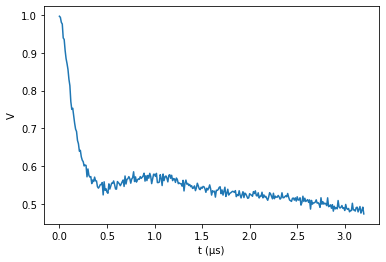

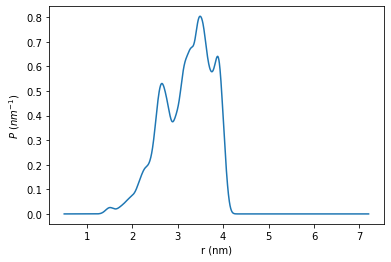

In [ ]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [ ]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 5182 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.710448893596803, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.065,0.001,0.063,0.067,0.000,0.000,5519.0,7431.0,1.00
λ,0.397,0.003,0.393,0.402,0.000,0.000,4115.0,6143.0,1.00
V₀,0.997,0.004,0.990,1.004,0.000,0.000,4073.0,5878.0,1.00
σ,0.008,0.000,0.007,0.008,0.000,0.000,6892.0,4053.0,1.00
δ,75394.436,40051.912,14253.416,148604.091,1799.901,1273.473,443.0,838.0,1.01
lg(α),0.285,0.118,0.059,0.499,0.006,0.004,453.0,844.0,1.01


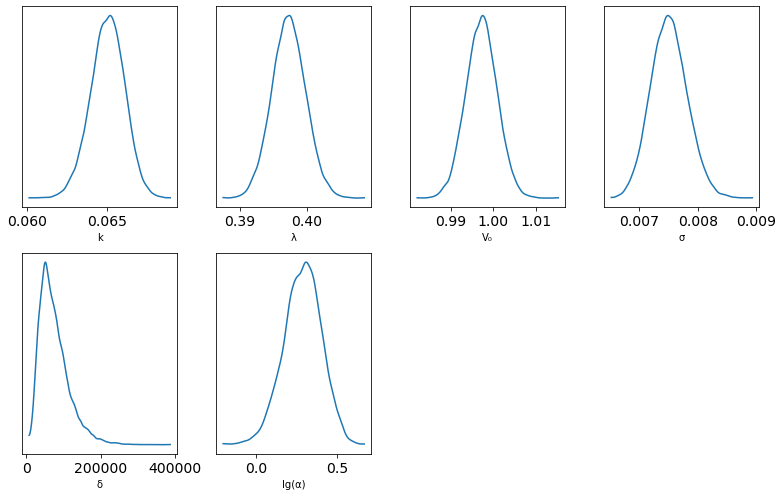

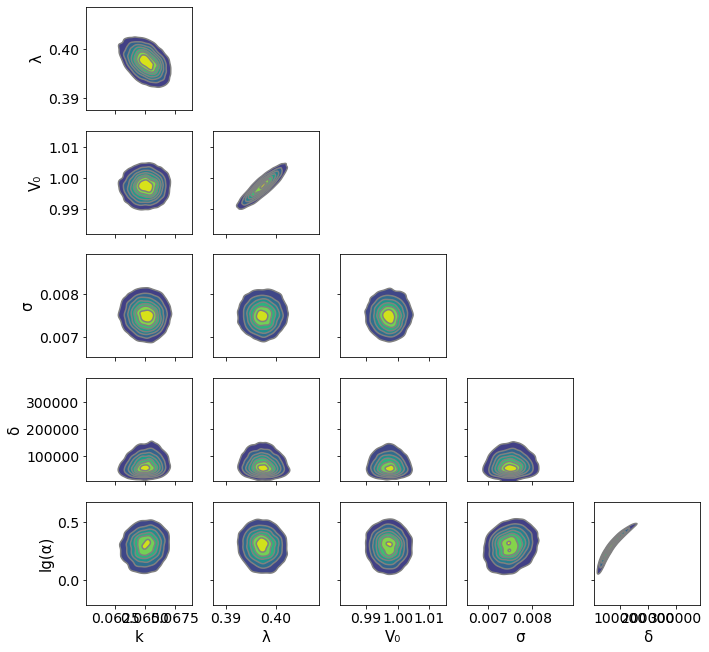

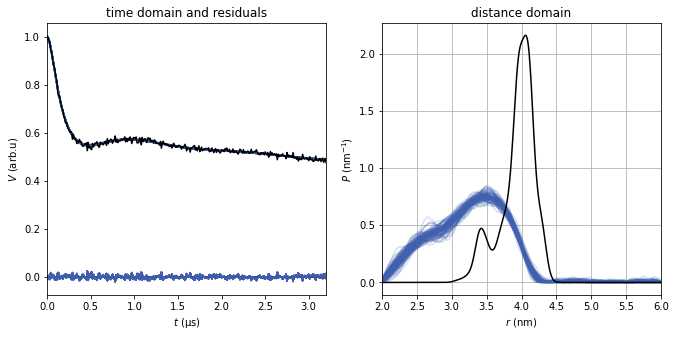

In [ ]:
dive.summary(trace, model, Pid = Pid)  

## Two Gaussians

In [ ]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 2}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, a, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1629 seconds.
The acceptance probability does not match the target. It is 0.8844338155870717, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8852812210184624, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  

## Three Gaussians

In [ ]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 3}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, a, w, r0_rel]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1718 seconds.
There were 146 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
There were 270 divergences after tuning. Increase `target_accept` or reparameterize.
There were 429 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r0[0],2.799,0.159,2.532,3.062,0.006,0.004,632.0,2021.0,1.01
r0[1],3.458,0.100,3.294,3.621,0.006,0.004,503.0,224.0,1.01
r0[2],3.864,0.079,3.734,3.957,0.004,0.002,713.0,485.0,1.00
w[0],0.926,0.250,0.435,1.287,0.008,0.006,983.0,2932.0,1.00
w[1],0.635,0.148,0.347,0.891,0.007,0.005,537.0,790.0,1.01
w[2],0.262,0.160,0.050,0.518,0.006,0.004,884.0,650.0,1.00
a[0],0.442,0.152,0.187,0.711,0.007,0.005,486.0,960.0,1.01
a[1],0.431,0.152,0.151,0.687,0.006,0.004,724.0,962.0,1.00
a[2],0.126,0.075,0.026,0.276,0.004,0.003,661.0,205.0,1.00
k,0.066,0.001,0.065,0.068,0.000,0.000,2746.0,4102.0,1.00


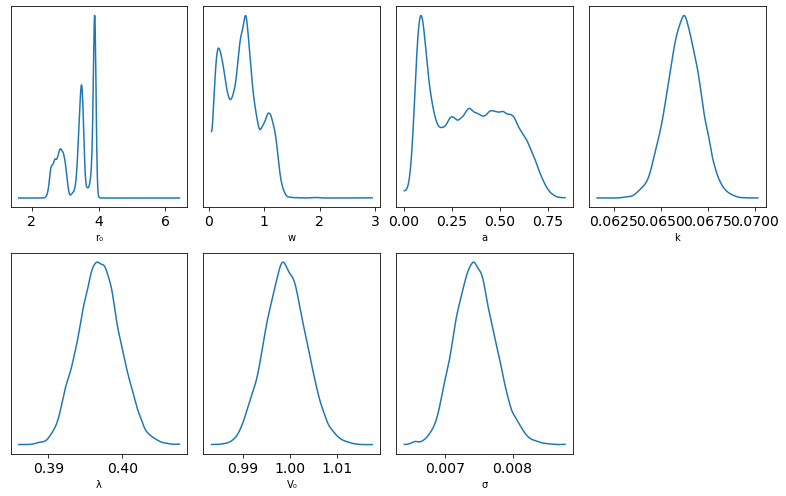

C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


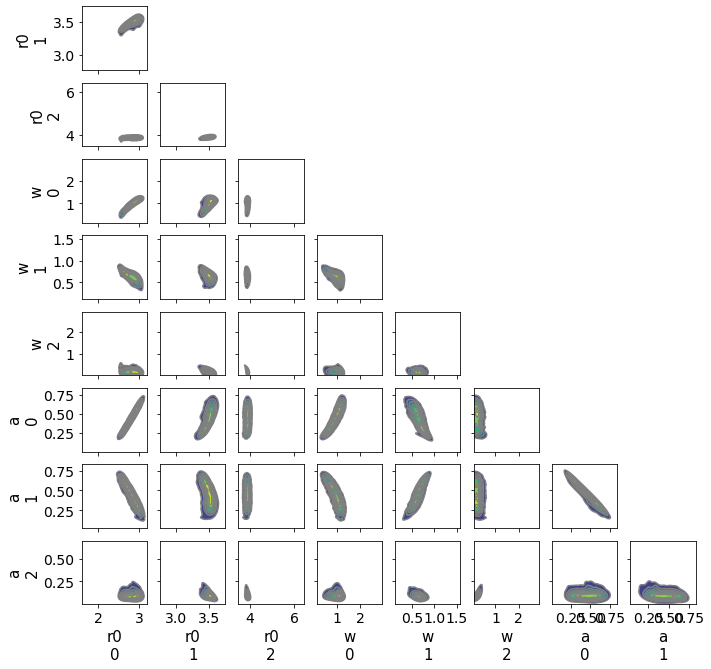

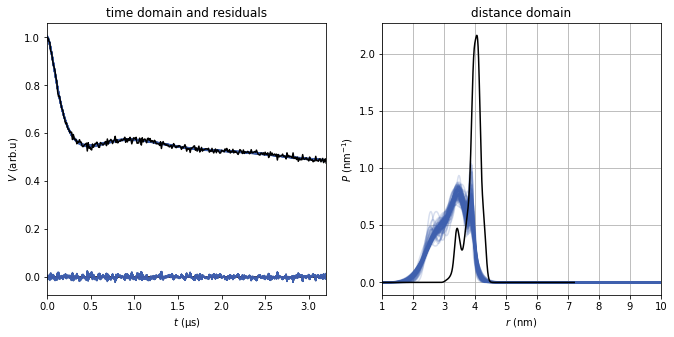

In [ ]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  